In [1]:
#imported module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#imported csv file
electricity=pd.read_csv('electric.csv',sep=',')

In [3]:
#converted date to datetime format
electricity['DATE']= pd.to_datetime(electricity['DATE'])

In [4]:
##cleaned dataset from NaN Value
electricity.dropna()

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


In [5]:
#set date as index
electricity.set_index('DATE',inplace=True)

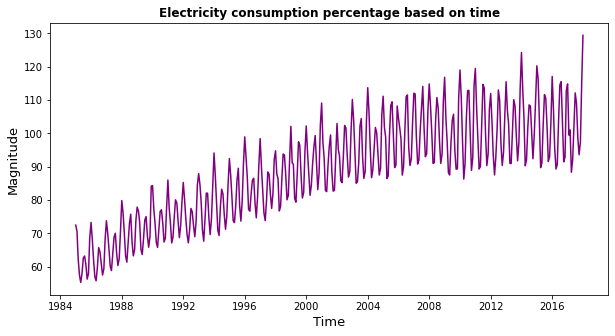

In [9]:
#plot electricity consumption percentage based on time
fig=plt.figure(figsize=(10,5))
fig.tight_layout()
plt.xlabel('Time', fontsize = 13)
plt.ylabel('Magnitude', fontsize = 13)
plt.title("Electricity consumption percentage based on time",fontweight='bold')
plt.plot(electricity,'purple')

In [10]:
#Tested the Stationarity
from statsmodels.tsa.stattools import adfuller

In [11]:
#defined new variable
test_result=adfuller(electricity['Value'])

In [12]:
#test
#Ho: it is non stationary
#H1: it is stationary

def adfuller_test(Value):
    result=adfuller(Value)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("P value is less than 0.05 (we can reject the null hypothesis(Ho). The data is stationary)")
    else:
        print("P value is greater than 0.05 (we cant reject the null hypothesis(Ho). The data is non-stationary)")

In [13]:
#checked whether it is stationary or not
adfuller_test(electricity['Value'])

ADF Test Statistic : -2.2569903500472455
p-value : 0.18621469116586759
#Lags Used : 15
Number of Observations Used : 381
P value is greater than 0.05 (we cant reject the null hypothesis(Ho). The data is non-stationary)


In [14]:
#calculated the difference
electricity['Value First Difference'] = electricity['Value'] - electricity['Value'].shift(1)

In [15]:
electricity['Value'].shift(1)

DATE
1985-01-01         NaN
1985-02-01     72.5052
1985-03-01     70.6720
1985-04-01     62.4502
1985-05-01     57.4714
                ...   
2017-09-01    108.9312
2017-10-01     98.6154
2017-11-01     93.6137
2017-12-01     97.3359
2018-01-01    114.7212
Name: Value, Length: 397, dtype: float64

In [16]:
#calculate the seasonal first difference
electricity['Seasonal First Difference']=electricity['Value']-electricity['Value'].shift(12)

In [17]:
#checked whether it is stationary or not
adfuller_test(electricity['Seasonal First Difference'].dropna())

ADF Test Statistic : -5.673482023381764
p-value : 8.812644938088811e-07
#Lags Used : 12
Number of Observations Used : 372
P value is less than 0.05 (we can reject the null hypothesis(Ho). The data is stationary)


In [18]:
#imported module for ARIMA
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [19]:
#imported module
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

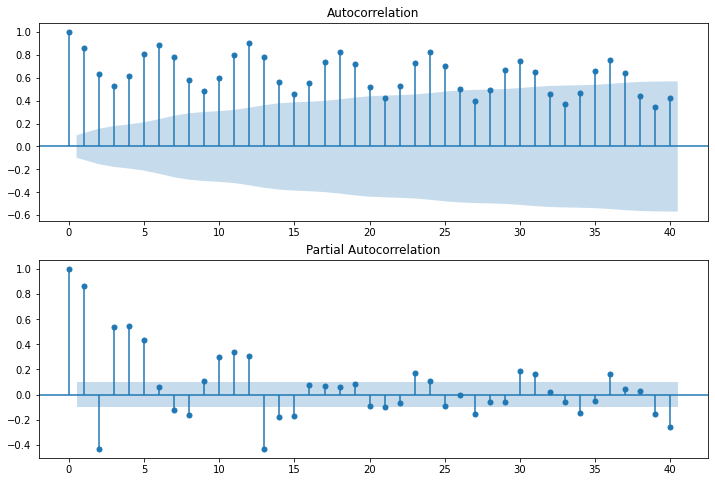

In [20]:
#plot Autocorrelation and Partial Autocorrelation
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(electricity['Value'].iloc[0:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(electricity['Value'].iloc[0:],lags=40,ax=ax2)

In [21]:
#fit model
model=ARIMA(electricity['Value'],order=(1,1,1))
model_fit=model.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will

In [22]:
#model summary
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Value   No. Observations:                  396
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1327.994
Method:                       css-mle   S.D. of innovations              6.904
Date:                Fri, 31 Dec 2021   AIC                           2663.989
Time:                        14:14:34   BIC                           2679.914
Sample:                    02-01-1985   HQIC                          2670.298
                         - 01-01-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1108      0.020      5.607      0.000       0.072       0.149
ar.L1.D.Value     0.5414      0.045     11.919      0.000       0.452       0.630
ma.L1.D.Value    -0.9767      0.010   -102.359      0.000      -0.995      -0.958
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8469           +0.0000j            1.8469            0.0000
MA.1            1.0238           +0.0000j            1.0238            0.0000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'ARIMA model observed vs predicted value')

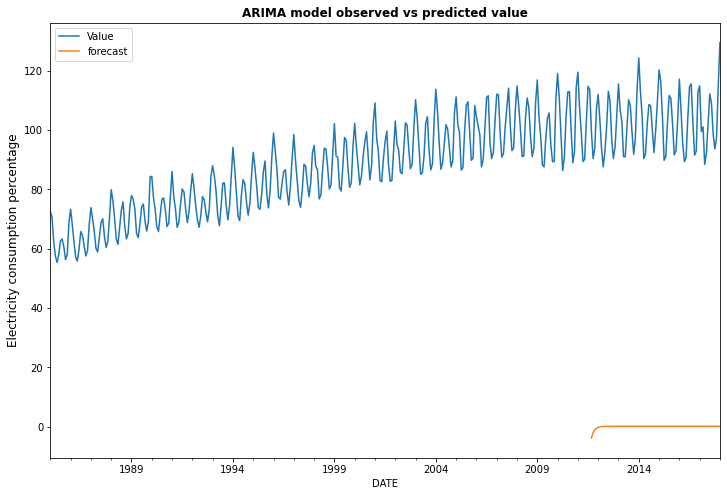

In [27]:
#plot observed vs predicted value
electricity['forecast']=model_fit.predict(start=320,end=396,dynamic=True)
electricity[['Value','forecast']].plot(figsize=(12,8))
plt.ylabel("Electricity consumption percentage",size=12)
plt.title("ARIMA model observed vs predicted value",fontweight='bold')

In [28]:
#with sarima
model=sm.tsa.statespace.SARIMAX(electricity['Value'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [29]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Value   No. Observations:                  397
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -888.613
Date:                            Fri, 31 Dec 2021   AIC                           1787.226
Time:                                    14:16:01   BIC                           1806.979
Sample:                                01-01-1985   HQIC                          1795.061
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5249      0.045     11.764      0.000       0.437       0.612
ma.L1         -0.9547      0.018    -54.378      0.000      -0.989      -0.920
ar.S.L12       0.0417      0.057      0.727      0.467      -0.071       0.154
ma.S.L12      -0.7688      0.045    -17.104      0.000      -0.857      -0.681
sigma2         5.8004      0.341     16.998      0.000       5.132       6.469
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                27.47
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               3.01   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'SARIMA model observed vs predicted value')

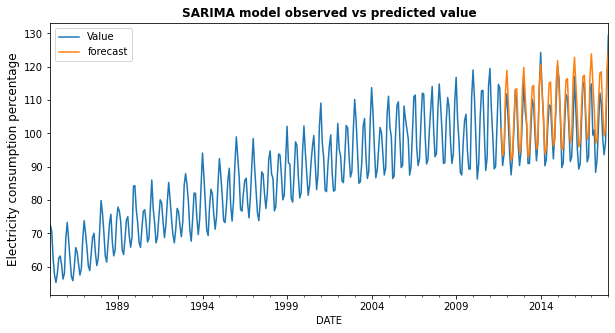

In [30]:
#plot observed vs predicted value with sarima
electricity['forecast']=results.predict(start=320,end=396,dynamic=True)
electricity[['Value','forecast']].plot(figsize=(10,5))
plt.ylabel("Electricity consumption percentage",size=12)
plt.title("SARIMA model observed vs predicted value",fontweight='bold')

# PREDICTION FOR THE NEXT 4 YEARS USING THE MODEL

In [31]:
#prediction for the next 4 years
from pandas.tseries.offsets import DateOffset
four_years_ahead=[electricity.index[-1]+ DateOffset(months=x)for x in range(0,48)]

In [32]:
#defined new variable
four_years_ahead_electricity=pd.DataFrame(index=four_years_ahead[1:],columns=electricity.columns)

In [33]:
#made new dataframe
four_years_ahead_electricity=pd.concat([electricity,four_years_ahead_electricity])

Text(0.5, 1.0, 'Prediction for the next 4 years using SARIMA model')

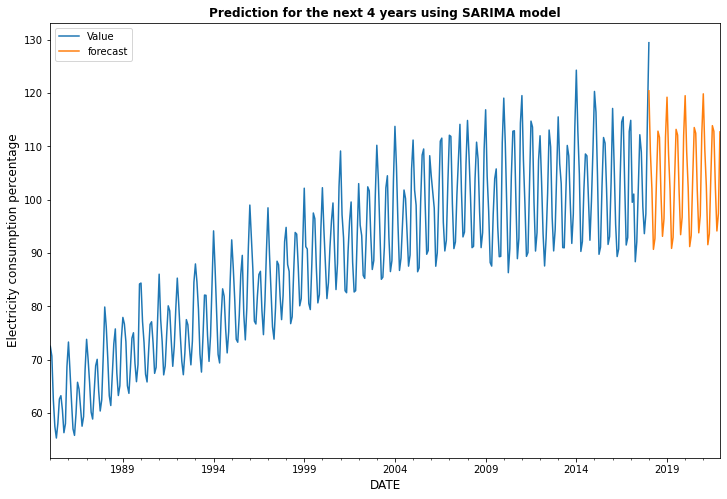

In [35]:
#predicted the future value
four_years_ahead_electricity['forecast'] = results.predict(start = 396, end = 444, dynamic= True)  
four_years_ahead_electricity[['Value', 'forecast']].plot(figsize=(12, 8)) 
plt.ylabel("Electricity consumption percentage",size=12)
plt.xlabel("DATE",size=12)
plt.title("Prediction for the next 4 years using SARIMA model",fontweight='bold')